## Import Data

In [50]:
# Library untuk melakukan data analysis dan data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Untuk load dataset dari file .csv
stock = pd.read_csv("X.csv")

## Exploratory Data Analysis

In [52]:
# Untuk melihat tipe data dan jumlah kolom
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3808 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.4+ KB


Dataset ini terdiri dari 7 variabel, dimana masing-masing variabel terdiri dari 3807 hingga 3808 baris. Variabel "Date" memiliki tipe data object, sedangkan variabel lainnya memiliki tipe data float64.

In [53]:
# Untuk melihat summary statistics pada kolom numerik
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03
mean,1207.953241,1230.793315,1185.663883,1207.159945,1047.459832,6.858102e+07
std,664.882117,679.635933,649.243280,665.202070,495.685067,1.308133e+08
min,290.000000,294.000000,285.000000,287.000000,280.434296,0.000000e+00
25%,768.578796,780.000000,751.779297,765.000000,713.299744,1.420484e+07
50%,957.573608,978.573059,945.000000,957.573608,902.836792,3.421840e+07
75%,1595.956055,1621.155273,1570.756714,1595.956055,1347.260193,7.306722e+07
max,4409.878418,4451.877441,4115.886719,4241.883301,3190.000000,2.186653e+09


In [54]:
# Untuk melihat lima baris pertama dan terakhir pada data
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,2380.000000,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,2220.000000,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,2600.000000,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,9.424343e+08


## Data Preprocessing

In [55]:
# Library untuk mengubah tipe data ke dalam bentuk date time
from datetime import datetime, date

In [56]:
# Untuk mengubah tipe data dari variabel "Date" menjadi date time
stock["Date"] = pd.to_datetime(stock["Date"])
stock = stock.sort_values("Date").reset_index(drop=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3808 non-null   datetime64[ns]
 1   Open       3807 non-null   float64       
 2   High       3807 non-null   float64       
 3   Low        3807 non-null   float64       
 4   Close      3807 non-null   float64       
 5   Adj Close  3807 non-null   float64       
 6   Volume     3807 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 208.4 KB


Dengan mengubah tipe data dari object menjadi datetime pada variabel "Date", proses pengurutan data berdasarkan waktu akan lebih akurat serta memberikan kemudahan dalam proses analisis dan visualisasi data time series.

In [57]:
# Untuk melihat interval waktu pada dataset
df = stock.copy()
df["Difference"] = df["Date"] - df["Date"].shift(1)
df[["Date", "Difference"]]

,Date,Difference
0,2005-09-29,NaT
1,2005-09-30,1 days
2,2005-10-03,3 days
3,2005-10-04,1 days
4,2005-10-05,1 days
...,...,...
3803,2021-01-28,1 days
3804,2021-01-29,1 days
3805,2021-02-01,3 days
3806,2021-02-02,1 days


Dari hasil di atas, terlihat bahwa interval antar data adalah 1 hari untuk sebagian besar dataset, tetapi beberapa data memiliki interval 3 hari. Pada data saham, interval 3 hari dapat terjadi karena umumnya data dikumpulkan dari hari Senin hingga Jumat, sementara hari Sabtu dan Minggu tidak ada data yang bisa dikumpulkan karena pasar saham tutup. Oleh karena itu, interval 3 hari tidak dianggap sebagai masalah pada kasus ini.

In [58]:
# Untuk melihat apakah ada missing value
print(stock.isna().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


Dari output tersebut, terlihat bahwa ada row yang memiliki missing value. Oleh karena jumlah row yang memiliki missing value sangat sedikit, yaitu hanya 1 row dan tidak memberikan pengaruh yang signifikan maka row tersebut akan dihapus.

In [59]:
# Untuk menghapus row yang memiliki missing value
stock.dropna(inplace=True)
print(stock.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [60]:
# Library untuk melakukan normalisasi pada dataset
from sklearn.preprocessing import MinMaxScaler

In [61]:
# Untuk mengubah bentuk array menjadi matriks 2D pada variabel "Close"
close = stock["Close"].values.reshape(-1, 1)

In [62]:
# Untuk melakukan normalisasi menggunakan Min-Max Scaling pada variabel "Close"
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close)

Dengan melakukan normalisasi data menggunakan MinMax Scaler, dapat membantu menjaga kestabilan dengan mencegah nilai yang terlalu besar atau kecil pada rentang nilai 0 hingga 1, serta lebih konsisten. 

## Data Visualization

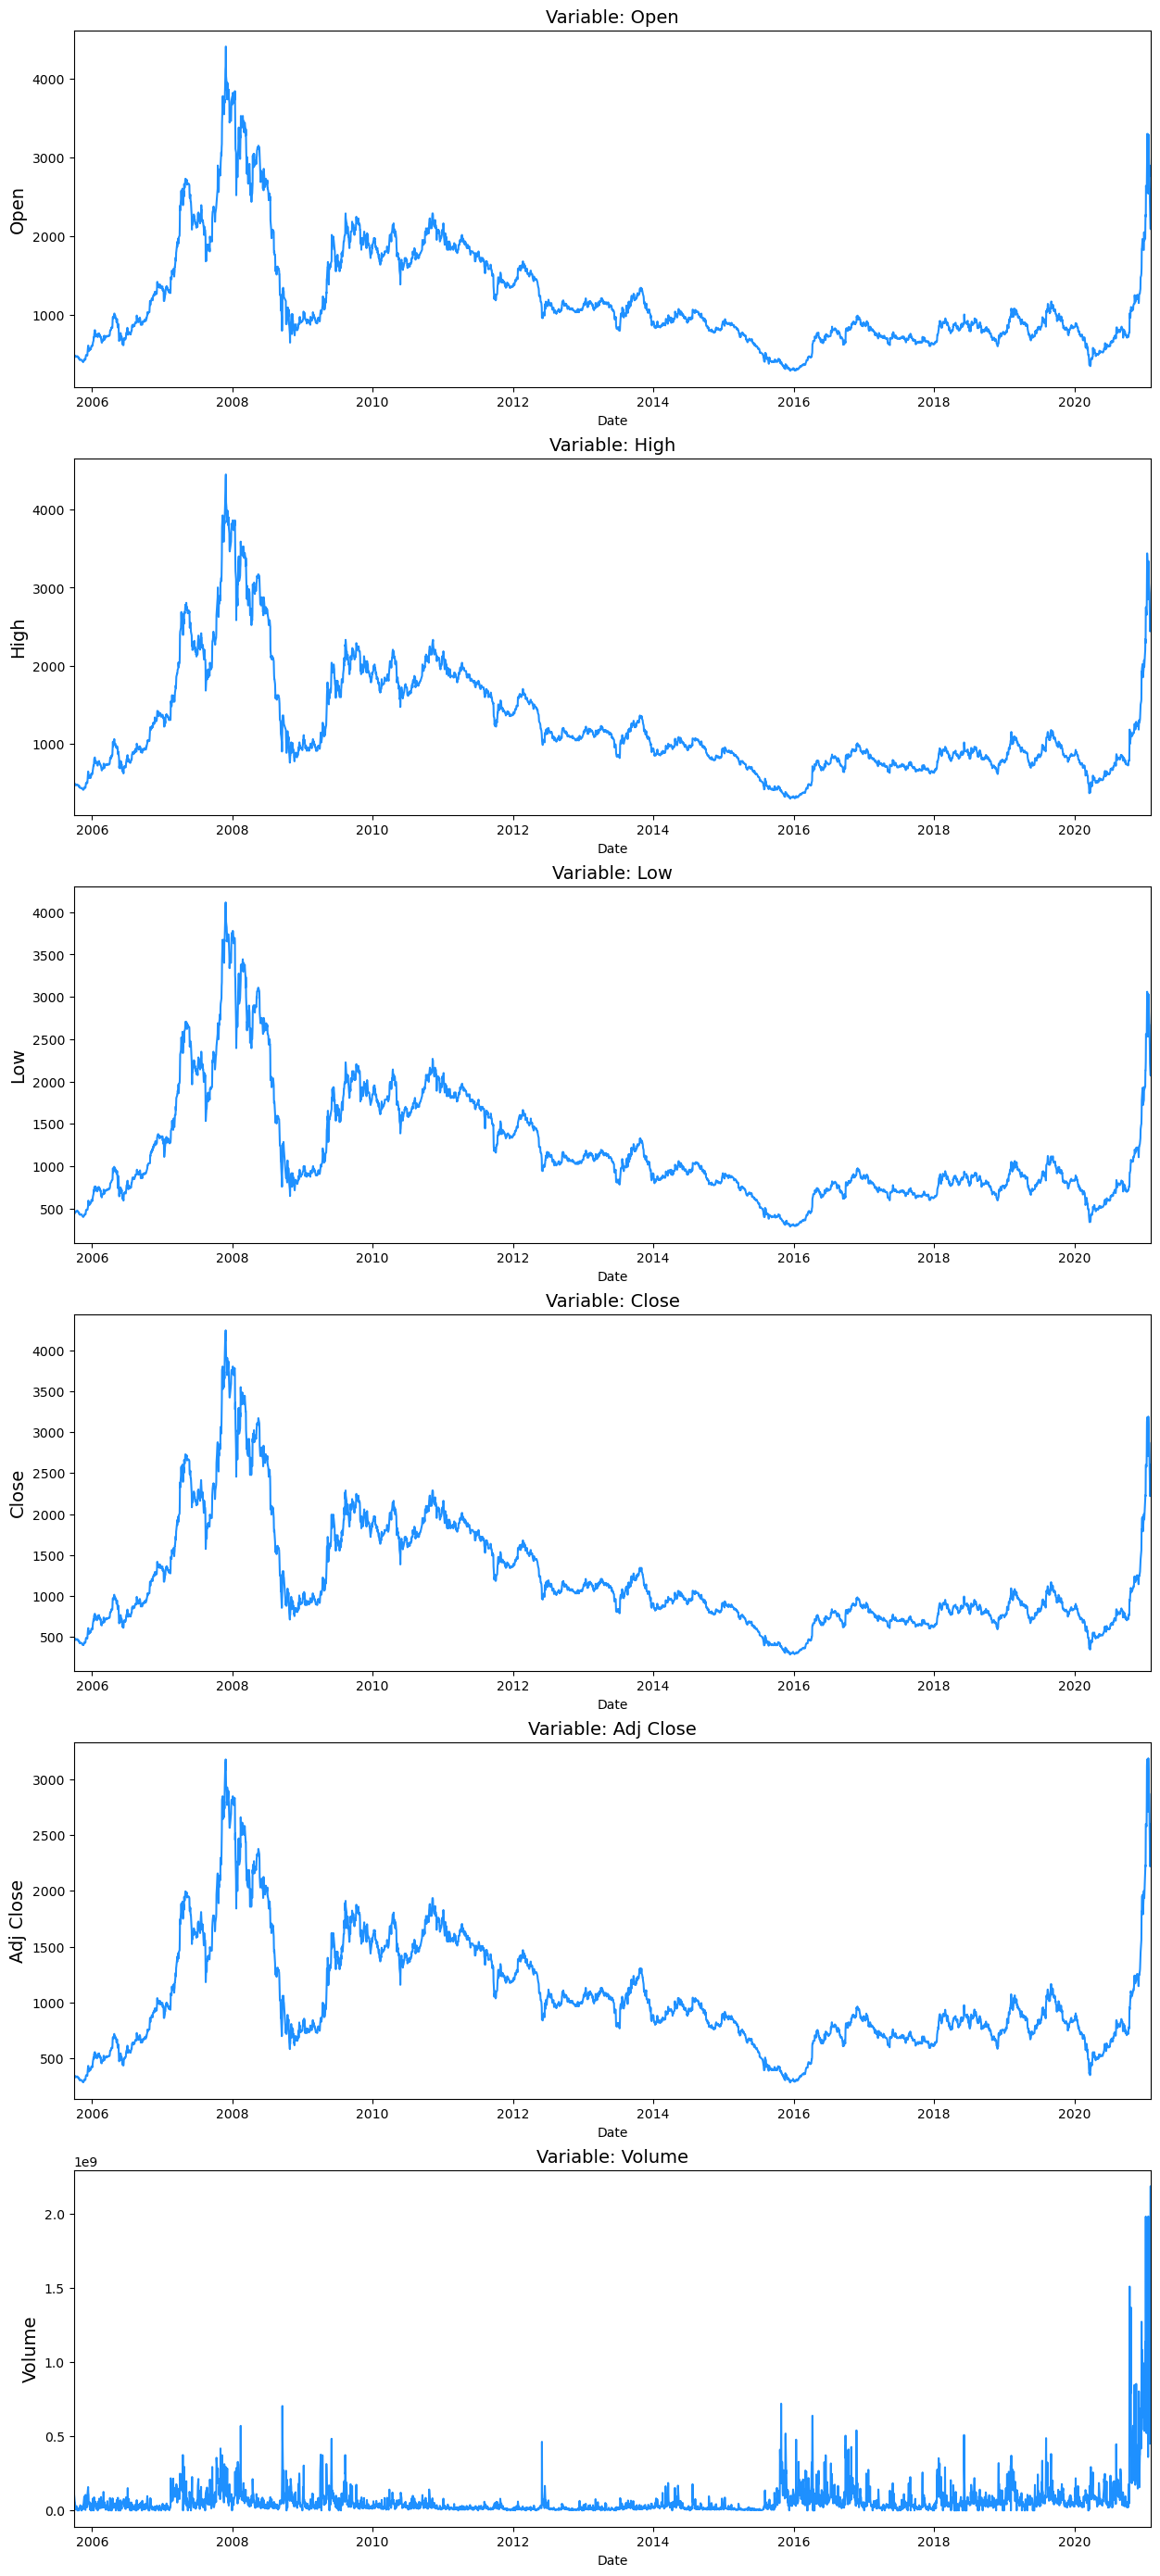

In [63]:
# Untuk membuat line plot dari masing-masing variabel
f, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 35))

for i, column in enumerate(stock.drop("Date", axis=1).columns):
    sns.lineplot(x=stock["Date"], y=stock[column].fillna(method="ffill"), ax=axs[i], color="dodgerblue")
    axs[i].set_title("Variable: {}".format(column), fontsize=14)
    axs[i].set_ylabel(ylabel=column, fontsize=14)
    axs[i].set_xlim([date(2005, 9, 29), date(2021, 2, 3)])

Dari plot di atas, dapat dilihat bahwa:
1. Open

    Plot ini menunjukkan harga pembukaan saham dari September 2005 hingga Februari 2021. Nilai harga pembukaan saham tertinggi terjadi pada akhir tahun 2007 dengan kisaran nilai 4400an, sedangkan nilai harga pembukaan saham terendah terjadi pada akhir tahun 2015 dengan kisaran nilai 200an.

2. High

    Plot ini menunjukkan harga saham tertinggi dari September 2005 hingga Februari 2021. Nilai harga saham tertinggi terjadi pada akhir tahun 2007 dengan kisaran nilai 4400an dan pada awal tahun 2021 dengan kisaran nilai 3000an.

3. Low

    Plot ini menunjukkan harga saham terendah dari September 2005 hingga Februari 2021. Nilai harga saham terendah terjadi pada akhir tahun 2016 dengan kisaran nilai 200\ an dan pada awal tahun 2020 dengan kisaran nilai yang sama.

4. Close

    Plot ini menunjukkan harga penutupan saham dari September 2005 hingga Februari 2021. Nilai harga penutupan saham tertinggi terjadi pada akhir tahun 2007 dengan kisaran nilai 4200an, sedangkan nilai harga penutupan saham terendah terjadi pada akhir tahun 2015 dengan kisaran nilai 200an.
    
5. Adj Close

    Plot ini menunjukkan harga penutupan saham yang telah disesuaikan dari September 2005 hingga Februari 2021. Nilai harga penutupan saham yang telah disesuaikan tertinggi terjadi pada awal tahun 2021 dengan kisaran nilai 3000an, sedangkan nilai harga penutupan saham yang telah disesuaikan terendah terjadi pada akhir tahun 2015 dengan kisaran nilai 200an.

6. Volume

    Plot ini menunjukkan volume perdagangan saham dari September 2005 hingga Februari 2021. Nilai volume perdagangan saham tertinggi terjadi pada awal tahun 2021 dengan kisaran nilai 2e^9 an, sedangkan nilai volume perdagangan saham terendah terjadi pada akhir tahun 2015 dengan kisaran nilai 0.

Kesimpulannya, terdapat tren naik pertama dari awal tahun 2006. Setelah mencapai puncaknya pada akhir tahun 2007, terjadi penurunan yang signifikan dalam harga saham hingga akhir tahun 2015. Kemudian, tren naik kedua terjadi pada awal tahun 2020. Setelah mencapai puncaknya pada awal tahun 2021, terlihat adanya penurunan dalam harga saham.

## Divide Input and Output using Window Size of 5 and Horizon of 1

In [64]:
# Untuk mambagi data menjadi input dan output dengan menggunakan 5 window size dan 1 horizon
def divide_dataset(dataset, window_size=5):
    data_X, data_Y = [], []

    for i in range(len(dataset) - window_size - 1):
        data_X.append(dataset[i:(i + window_size), 0])
        data_Y.append([dataset[i + window_size, 0]])

    return(np.array(data_X), np.array(data_Y))

In [65]:
# Untuk memanggil function divide_dataset
input_data, output_data = divide_dataset(scaled_close, 5)

Window size adalah jumlah observasi yang digunakan sebagai input untuk memprediksi nilai. Sementara itu, horizon adalah jumlah time step ke depan yang ingin diprediksi. Pada saat menggunakan 5 window size dan 1 horizon, jika window pertama adalah [1,2,3,4,5] maka nilai yang akan diprediksi adalah nilai ke-6. Lalu jika window kedua adalah [2,3,4,5,6] maka nilai yang akan diprediksi adalah nilai ke-7. Begitupula seterusnya.

## Split the Dataset

In [66]:
# Untuk menentukan size dari 80% data training, 10% data validation, dan 10% data testing
train_size = int(0.8 * len(input_data))
val_size = int(0.1 * len(input_data))
test_size = len(input_data) - train_size - val_size

In [67]:
# Untuk membagi dataset menjadi data training, data validation, dan data testing
x_train, y_train = input_data[:train_size], output_data[:train_size]
x_val, y_val = input_data[train_size:train_size + val_size], output_data[train_size:train_size + val_size]
x_test, y_test = input_data[train_size + val_size:], output_data[train_size + val_size:]

In [68]:
# Untuk melihat banyaknya data training, data validation, dan data testing
print("Data training     (x, y): (", len(x_train), ",", len(y_train), ")")
print("Data validation    (x, y): (", len(x_test), ",", len(y_test), ")")
print("Data testing      (x, y): (", len(x_val), ",", len(y_val), ")")

Data training     (x, y): ( 3040 , 3040 )
Data validation    (x, y): ( 381 , 381 )
Data testing      (x, y): ( 380 , 380 )


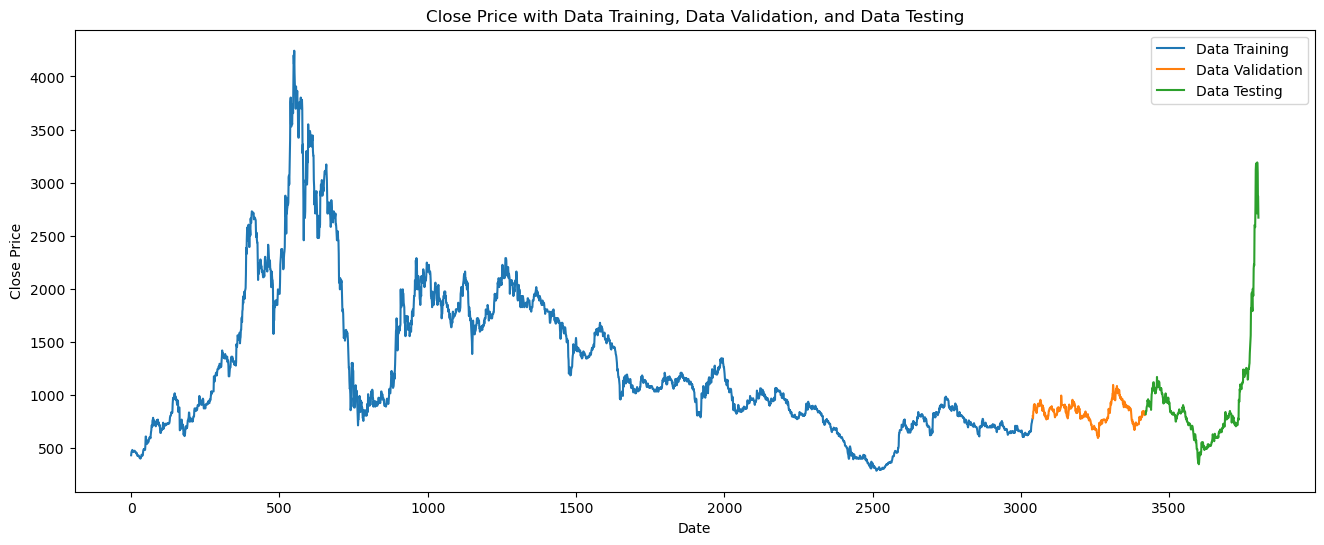

In [69]:
# Untuk membuat line plot dari variabel "Close" sesuai dengan data training, data validation dan data testing
close_train = pd.DataFrame({"Date": stock["Date"], "Close": stock["Close"]}).iloc[:train_size]
close_val = pd.DataFrame({"Date": stock["Date"], "Close": stock["Close"]}).iloc[train_size:train_size + val_size]
close_test = pd.DataFrame({"Date": stock["Date"], "Close": stock["Close"]}).iloc[train_size + val_size:train_size + val_size + len(x_test)]

plt.figure(figsize=(16, 6))
plt.plot(close_train.index, close_train["Close"], label="Data Training")
plt.plot(close_val.index, close_val["Close"], label="Data Validation")
plt.plot(close_test.index, close_test["Close"], label="Data Testing")

plt.title("Close Price with Data Training, Data Validation, and Data Testing")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Dari output tersebut, terlihat bahwa dari 3801 data berhasil dibagi menjadi 80% data training yaitu sebanyak 3040 data, 10% data validation yaitu sebanyak 381 data, dan 10% data testing yaitu sebanyak 380 data.

In [70]:
# Untuk mengubah bentuk array menjadi 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Create Base Architecture

In [71]:
# Library untuk membuat architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError

In [72]:
# Untuk membuat architecture
model_LSTM = Sequential()

# Untuk membuat input layer
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_LSTM.add(Dropout(0.2))

# Untuk membuat hidden layer
model_LSTM.add(LSTM(64, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(32, return_sequences=False))
model_LSTM.add(Dropout(0.2))

# Untuk membuat output layer
model_LSTM.add(Dense(1))

Pada layer LSTM pertama, model menggunakan 128 unit neuron dan menggunakan activation function defaultnya, yaitu linear. Input shapenya adalah (5,1) yang diperoleh dari x_train.shape[1] sebagai jumlah timestep dan x_train.shape[2] sebagai jumlah fitur.

Pada layer LSTM kedua, model menggunakan 64 unit neuron dan menggunakan activation function defaultnya, yaitu linear. 

Pada layer LSTM ketiga, model menggunakan 32 unit neuron, menggunakan activation function defaultnya, yaitu linear serta  hanya mereturn output terakhir dari timestep (return_sequences = False).

Kemudian setiap layer LSTM akan diikuti oleh layer Dropout dengan rate 0.2 untuk menghindari terjadinya overfitting.

Pada output layer, model menggunakan 1 unit neuron (task regression) dengan activation function defaultnya, yaitu linear.

In [73]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_6 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_7 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

Dari architecture di atas, terdapat 3 layer LSTM dan 1 layer fully connected. Total params diperoleh dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [99]:
# Library untuk menggunakan optimizer Adam
from tensorflow.keras.optimizers import Adam

In [75]:
# Untuk mengubah parameter dari optimizer 
opt = Adam(learning_rate=0.01)

In [76]:
# Untuk mengcompile model
model_LSTM.compile(optimizer=opt, 
                   loss="mean_squared_error",
                   metrics=[MeanAbsoluteError()])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "Adam" dengan learning rate 0.01 karena memberikan performa yang lebih baik, kemudian loss "mean_squared_error" untuk mengukur rata-rata kuadrat dari selisih hasil prediksi dan data sebenarnya, serta yang terakhir metrics "MeanAbsoluteError" untuk menampilkan rata-rata absolut dari selisih hasil prediksi dan data sebenarnya.

In [77]:
# Untuk melakukan training pada model
history = model_LSTM.fit(x_train, y_train,
                epochs = 20, 
                batch_size = 32,
                validation_data = (x_val, y_val))

Epoch 1/20


95/95 [==============================] - 13s 49ms/step - loss: 0.0081 - mean_absolute_error: 0.0501 - val_loss: 1.0844e-04 - val_mean_absolute_error: 0.0085
Epoch 2/20
95/95 [==============================] - 2s 25ms/step - loss: 0.0014 - mean_absolute_error: 0.0264 - val_loss: 1.7298e-04 - val_mean_absolute_error: 0.0113
Epoch 3/20
95/95 [==============================] - 3s 36ms/step - loss: 0.0014 - mean_absolute_error: 0.0250 - val_loss: 7.1493e-05 - val_mean_absolute_error: 0.0064
Epoch 4/20
95/95 [==============================] - 3s 33ms/step - loss: 0.0014 - mean_absolute_error: 0.0249 - val_loss: 1.0806e-04 - val_mean_absolute_error: 0.0087
Epoch 5/20
95/95 [==============================] - 4s 42ms/step - loss: 0.0012 - mean_absolute_error: 0.0229 - val_loss: 2.4585e-04 - val_mean_absolute_error: 0.0141
Epoch 6/20
95/95 [==============================] - 3s 28ms/step - loss: 9.6379e-04 - mean_absolute_error: 0.0210 - val_loss: 2.8198e-04 - val_mean_absolute_error: 0.0154
Epoc

In [78]:
# Untuk menyimpan history dari training model yang sebelumnya telah dilakukan
hist_dict = history.history
train_loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]

In [79]:
# Untuk menyimpan range epoch dari training model sebelumnya
epochs_loss = range(1, len(train_loss)+1)

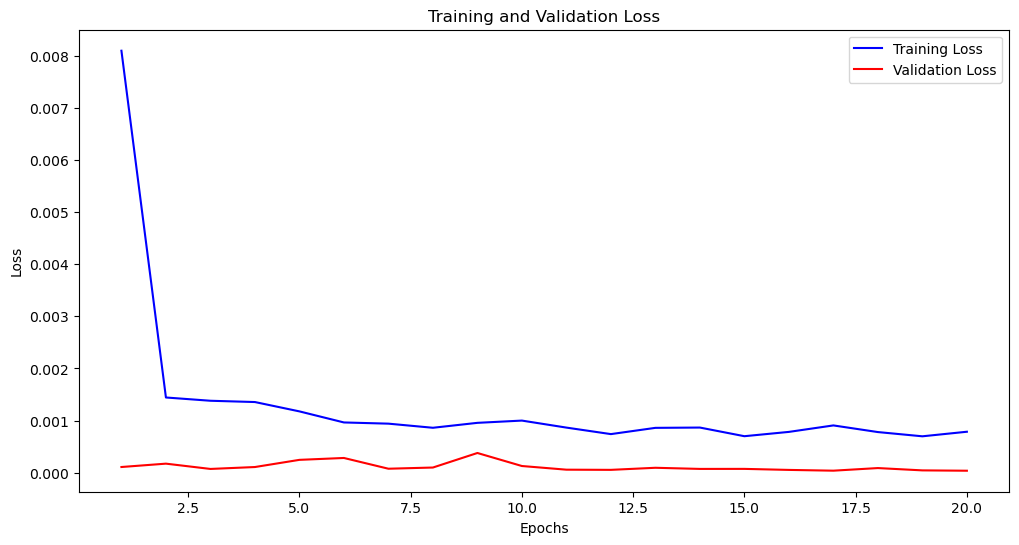

In [80]:
# Untuk membuat plot training dan validation loss 
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

axs.plot(epochs_loss, train_loss, 'b-', label="Training Loss")
axs.plot(epochs_loss, val_loss, 'r-', label="Validation Loss")
axs.set_title("Training and Validation Loss")
axs.set_xlabel("Epochs")
axs.set_ylabel("Loss")
axs.legend()

plt.show()

Setelah ditrain sebanyak 20 epoch dan menggunakan 32 sampel data setiap batchnya, diperoleh hasil train loss nya sebesar 7.8544e-04 dan val loss nya sebesar 3.7244e-05. Sementara itu, diperoleh hasil train MAE nya sebesar 0.0197 dan val MAE nya sebesar 0.0044.

Model ini cukup baik karena nilai loss dan MAE nya terus mengalami penurunan. Semakin kecil nilai loss dan MAE nya, maka semakin baik model dalam melakukan prediksi.

Selain itu, perbedaan antara nilai loss dan MAE dari data training dan data validation tidak terlalu jauh. Artinya, model ini tidak menunjukkan adanya indikasi overfitting ataupun underfitting.

## Create Base Architecture with Sequential  Self-Attention

Wang-Cheng Kang dan Julian McAuley dalam pepernya yang berjudul "Self-Attentive Sequential Recommendation" menjelaskan tentang mekanisme attention. Di dalam papernya, dijelaskan bahwa mekanisme attention digunakan untuk memfokuskan model pada bagian yang dianggap penting atau relevan dari input ketika menghasilkan output berdasarkan bobot yang diperoleh.

Dalam self-attention, setiap elemen dalam input sequence memiliki tiga vektor, yaitu query (Q), key (K), dan value (V). Bobot tadi akan dihitung dengan mengalikan vektor query dengan vektor key dan kemudian mengaplikasikan fungsi softmax pada hasilnya untuk mendapatkan bobotnya.

Pada time series, self-attention ini dapat digunakan untuk memfokusan model pada bagian relevan dengan memberikan bobot pada setiap titik waktu berdasarkan relevansinya dengan titik-titik waktu lainnya. Sehingga, dengan menggunakan self-attention pada data time series, model dapat menangani pola dan dinamika yang kompleks dalam suatu waktu dengan lebih baik.

In [81]:
# Library untuk membuat architecture menggunakan Sequential Self-Attention
from keras_self_attention import SeqSelfAttention

In [82]:
# Untuk membuat architecture
model_self_LSTM = Sequential()

# Untuk membuat input layer
model_self_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_self_LSTM.add(SeqSelfAttention(attention_activation="linear"))
model_self_LSTM.add(Dropout(0.2))

# Untuk membuat hidden layer
model_self_LSTM.add(LSTM(64, return_sequences=True))
model_self_LSTM.add(SeqSelfAttention(attention_activation="linear"))
model_self_LSTM.add(Dropout(0.2))

model_self_LSTM.add(LSTM(32, return_sequences=False))
model_self_LSTM.add(Dropout(0.2))

# Untuk membuat output layer
model_self_LSTM.add(Dense(1))

c:\Users\User\anaconda3\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Pada layer LSTM pertama, model menggunakan 128 unit neuron dan menggunakan activation function defaultnya, yaitu linear. Input shapenya adalah (5,1) yang diperoleh dari x_train.shape[1] sebagai jumlah timestep dan x_train.shape[2] sebagai jumlah fitur.

Pada layer LSTM kedua, model menggunakan 64 unit neuron dan menggunakan activation function defaultnya, yaitu linear. 

Pada layer LSTM ketiga, model menggunakan 32 unit neuron, menggunakan activation function defaultnya, yaitu linear serta  hanya mereturn output terakhir dari timestep (return_sequences = False).

Setelah layer LSTM pertama dan kedua, model menggunakan layer Sequential Self-Attention dan menggunakan activation function linear.

Kemudian setelah layer Sequential Self-Attention dan juga layer LSTM terakhir akan diikuti oleh layer Dropout dengan rate 0.2 untuk menghindari terjadinya overfitting.

Pada output layer, model menggunakan 1 unit neuron (task regression) dengan activation function defaultnya, yaitu linear.


In [83]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model_self_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 128)            66560     
                                                                 
 seq_self_attention_2 (SeqS  (None, 5, 128)            8257      
 elfAttention)                                                   
                                                                 
 dropout_9 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 64)             49408     
                                                                 
 seq_self_attention_3 (SeqS  (None, 5, 64)             4161      
 elfAttention)                                                   
                                                                 
 dropout_10 (Dropout)        (None, 5, 64)            

Dari architecture di atas, terdapat 3 layer LSTM, 2 layer Sequential Self-Attention dan 1 layer fully connected. Total params diperoleh dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [84]:
# Untuk mengubah parameter dari optimizer 
opt = Adam(learning_rate=0.01)

In [85]:
# Untuk mengcompile model
model_self_LSTM.compile(optimizer=opt, 
                   loss="mean_squared_error",
                   metrics=[MeanAbsoluteError()])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "Adam" dengan learning rate 0.01 karena memberikan performa yang lebih baik, kemudian loss "mean_squared_error" untuk mengukur rata-rata kuadrat dari selisih hasil prediksi dan data sebenarnya, serta yang terakhir metrics "MeanAbsoluteError" untuk menampilkan rata-rata absolut dari selisih hasil prediksi dan data sebenarnya.

In [86]:
# Untuk melakukan training pada model
history = model_self_LSTM.fit(x_train, y_train,
                epochs = 20, 
                batch_size = 32,
                validation_data = (x_val, y_val))

Epoch 1/20


95/95 [==============================] - 10s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0443 - val_loss: 2.0864e-04 - val_mean_absolute_error: 0.0120
Epoch 2/20
95/95 [==============================] - 2s 20ms/step - loss: 0.0017 - mean_absolute_error: 0.0287 - val_loss: 5.6755e-04 - val_mean_absolute_error: 0.0216
Epoch 3/20
95/95 [==============================] - 2s 20ms/step - loss: 0.0013 - mean_absolute_error: 0.0245 - val_loss: 4.6944e-04 - val_mean_absolute_error: 0.0201
Epoch 4/20
95/95 [==============================] - 2s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0272 - val_loss: 7.1460e-05 - val_mean_absolute_error: 0.0066
Epoch 5/20
95/95 [==============================] - 5s 49ms/step - loss: 0.0011 - mean_absolute_error: 0.0226 - val_loss: 1.2617e-04 - val_mean_absolute_error: 0.0096
Epoch 6/20
95/95 [==============================] - 3s 29ms/step - loss: 0.0010 - mean_absolute_error: 0.0215 - val_loss: 8.1651e-05 - val_mean_absolute_error: 0.0069
Epoch 7/

In [87]:
# Untuk menyimpan history dari training model yang sebelumnya telah dilakukan
hist_dict = history.history
train_loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]

In [88]:
# Untuk menyimpan range epoch dari training model sebelumnya
epochs_loss = range(1, len(train_loss)+1)

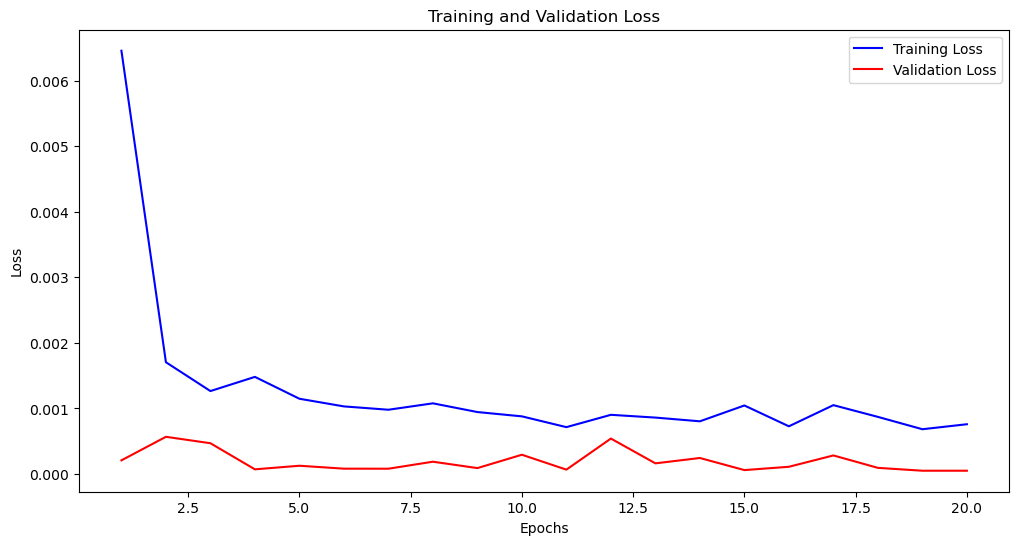

In [89]:
# Untuk membuat plot training dan validation loss 
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

axs.plot(epochs_loss, train_loss, 'b-', label="Training Loss")
axs.plot(epochs_loss, val_loss, 'r-', label="Validation Loss")
axs.set_title("Training and Validation Loss")
axs.set_xlabel("Epochs")
axs.set_ylabel("Loss")
axs.legend()

plt.show()

Setelah ditrain sebanyak 20 epoch dan menggunakan 32 sampel data setiap batchnya, diperoleh hasil train loss nya sebesar 7.5922e-04 dan val loss nya sebesar 5.0372e-05. Sementara itu, diperoleh hasil train MAE nya sebesar 0.0188 dan val MAE nya sebesar 0.0057.

Model ini cukup baik karena nilai loss dan MAE nya terus mengalami penurunan. Semakin kecil nilai loss dan MAE nya, maka semakin baik model dalam melakukan prediksi.

Selain itu, perbedaan antara nilai loss dan MAE dari data training dan data validation tidak terlalu jauh. Artinya, model ini tidak menunjukkan adanya indikasi overfitting ataupun underfitting.


## Evaluate the Architecture using Data Testing

In [90]:
# Untuk melakukan evaluasi menggunakan data testing
LSTM_results = model_LSTM.evaluate(x_test, y_test, batch_size=32)
self_LSTM_results = model_self_LSTM.evaluate(x_test, y_test, batch_size=32)

print("")
print("MSE Value")
print("LSTM without Self-Attention:", LSTM_results[0])
print("LSTM with Self-Attention:", self_LSTM_results[0])
print("")
print("MAE Value")
print("LSTM without Self-Attention:", LSTM_results[1])
print("LSTM with Self-Attention:", self_LSTM_results[1])

 1/12 [=>............................] - ETA: 2s - loss: 9.8774e-05 - mean_absolute_error: 0.0079

12/12 [==============================] - 0s 20ms/step - loss: 2.4405e-04 - mean_absolute_error: 0.0089

MSE Value
LSTM without Self-Attention: 0.0003477886784821749
LSTM with Self-Attention: 0.0002440496755298227

MAE Value
LSTM without Self-Attention: 0.009697426110506058
LSTM with Self-Attention: 0.008949081413447857


Dari hasil di atas, terlihat bahwa model dengan tambahan layer Sequential Self-Attention memiliki nilai MSE lebih kecil daripada model tanpa tambahan layer Sequential Self-Attention. Hal ini menunjukkan bahwa model melakukan prediksi yang lebih akurat dengan tingkat error yang kecil.

Selain itu, model dengan tambahan layer Sequential Self-Attention juga memiliki nilai MAE lebih kecil daripada model tanpa tambahan layer Sequential Self-Attention. Lagi-lagi, hal ini menunjukkan bahwa model melakukan prediksi yang lebih akurat dengan tingkat error yang kecil.

In [91]:
# Untuk melakukan prediksi menggunakan data testing
LSTM_prediction = model_LSTM.predict(x_test)
self_LSTM_prediction = model_self_LSTM.predict(x_test)

12/12 [==============================] - 5s 20ms/step


In [92]:
# Untuk mengubah skala data ke bentuk awal
LSTM_prediction = scaler.inverse_transform(LSTM_prediction.reshape(-1, 1))
LSTM_original = scaler.inverse_transform(y_test.reshape(-1, 1))

self_LSTM_prediction = scaler.inverse_transform(self_LSTM_prediction.reshape(-1, 1))
self_LSTM_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [93]:
# Library untuk menggunakan metrics evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [94]:
# Untuk melihat hasil metrics evaluation
LSTM_mse = mean_squared_error(LSTM_original, LSTM_prediction)
LSTM_rmse = np.sqrt(LSTM_mse)
LSTM_mae = mean_absolute_error(LSTM_original, LSTM_prediction)
LSTM_mape = mean_absolute_percentage_error(LSTM_original, LSTM_prediction)
LSTM_r2 = r2_score(LSTM_original, LSTM_prediction)

self_LSTM_mse = mean_squared_error(self_LSTM_original, self_LSTM_prediction)
self_LSTM_rmse = np.sqrt(self_LSTM_mse)
self_LSTM_mae = mean_absolute_error(self_LSTM_original, self_LSTM_prediction)
self_LSTM_mape = mean_absolute_percentage_error(self_LSTM_original, self_LSTM_prediction)
self_LSTM_r2 = r2_score(self_LSTM_original, self_LSTM_prediction)

print("MSE Value")
print("LSTM without Self-Attention:", LSTM_mse)
print("LSTM with Self-Attention:", self_LSTM_mse)
print("")
print("RMSE Value")
print("LSTM without Self-Attention:", LSTM_rmse)
print("LSTM with Self-Attention:", self_LSTM_rmse)
print("")
print("MAE Value")
print("LSTM without Self-Attention:", LSTM_mae)
print("LSTM with Self-Attention:", self_LSTM_mae)
print("")
print("MAPE Value")
print("LSTM without Self-Attention:", LSTM_mape)
print("LSTM with Self-Attention:", self_LSTM_mape)
print("")
print("R2 Value")
print("LSTM without Self-Attention:", LSTM_r2)
print("LSTM with Self-Attention:", self_LSTM_r2)

MSE Value
LSTM without Self-Attention: 5439.7965828945
LSTM with Self-Attention: 3817.2063105642137

RMSE Value
LSTM without Self-Attention: 73.75497666526985
LSTM with Self-Attention: 61.78354401104079

MAE Value
LSTM without Self-Attention: 38.3521815823132
LSTM with Self-Attention: 35.39256554951504

MAPE Value
LSTM without Self-Attention: 0.03616356900534343
LSTM with Self-Attention: 0.03509143129790148

R2 Value
LSTM without Self-Attention: 0.9794208528428595
LSTM with Self-Attention: 0.9855592301665685


Metriks evaluasi yang saya gunakan antara lain adalah MSE, RMSE, MAE, MAPE, dan R2. Pilihan ini merupakan gabungan dari kedua paper, dimana Hum Nath Bhandari dkk. menggunakan RMSE, MAPE, dan R sebagai metriks evaluasi ketika memprediksi indeks harga saham menggunakan LSTM lalu Burak Gülmez menggunakan MSE, MAE, MAPE, dan R2 sebagai metriks evaluasi ketika memprediksi harga saham menggunakan LSTM.

- MSE: Digunakan untuk mengukur rata-rata dari kuadrat selisih antara hasil prediksi dan data sebenarnya. Model tanpa tambahan layer Sequential Self-Attention memiliki nilai MSE sebesar 5439.80, sedangkan model dengan tambahan layer Sequential Self-Attention memiliki nilai MSE sebesar 3817.21. 


- RMSE: Digunakan untuk mengukur akar kuadrat rata-rata dari kuadrat selisih antara hasil prediksi dan data sebenarnya. Model tanpa tambahan layer Sequential Self-Attention memiliki nilai RMSE sebesar 73.75, sedangkan model dengan tambahan layer Sequential Self-Attention memiliki nilai RMSE sebesar 61.78. 

- MAE: Digunakan untuk mengukur rata-rata dari nilai absolut selisih hasil prediksi dan data sebenarnya. Model tanpa tambahan layer Sequential Self-Attention memiliki nilai MAE sebesar 38.35, sedangkan model dengan tambahan layer Sequential Self-Attention memiliki nilai MAE sebesar 35.39. 

- MAPE: Digunakan untuk mengukur persentase rata-rata dari nilai absolut selisih antara prediksi dan nilai sebenarnya. Model tanpa tambahan layer Sequential Self-Attention memiliki nilai MAPE atau tingkat kesalahan sebesar 3.6%, sedangkan model dengan tambahan layer Sequential Self-Attention memiliki nilai MAPE atau tingkat kesalahan sebesar 3.5%. 

- R2: Digunakan untuk mengukur seberapa baik model dalam melakukan fitting data. Model tanpa tambahan layer Sequential Self-Attention memiliki nilai R2 sebesar 97.9%, sedangkan model dengan tambahan layer Sequential Self-Attention memiliki nilai R2 sebesar 98.6%. 

Dari gabungan hasil metriks evaluasi di atas, terlihat bahwa model dengan tambahan layer Sequential Self-Attention memiliki nilai MSE, RMSE, MAE, dan MAPE lebih kecil daripada model tanpa tambahan layer Sequential Self-Attention. Selain itu, model dengan tambahan layer Sequential Self-Attention juga memiliki nilai R2 yang lebih tinggi daripada model tanpa tambahan layer Sequential Self-Attention.

Berdasarkan penjelasan di atas, model dengan tambahan layer Sequential Self-Attention lebih baik daripada model tanpa tambahan layer Sequential Self-Attention.

## Line Chart Comparison between the Prediction Values and the Actual Values 

### LSTM without Self-Attention

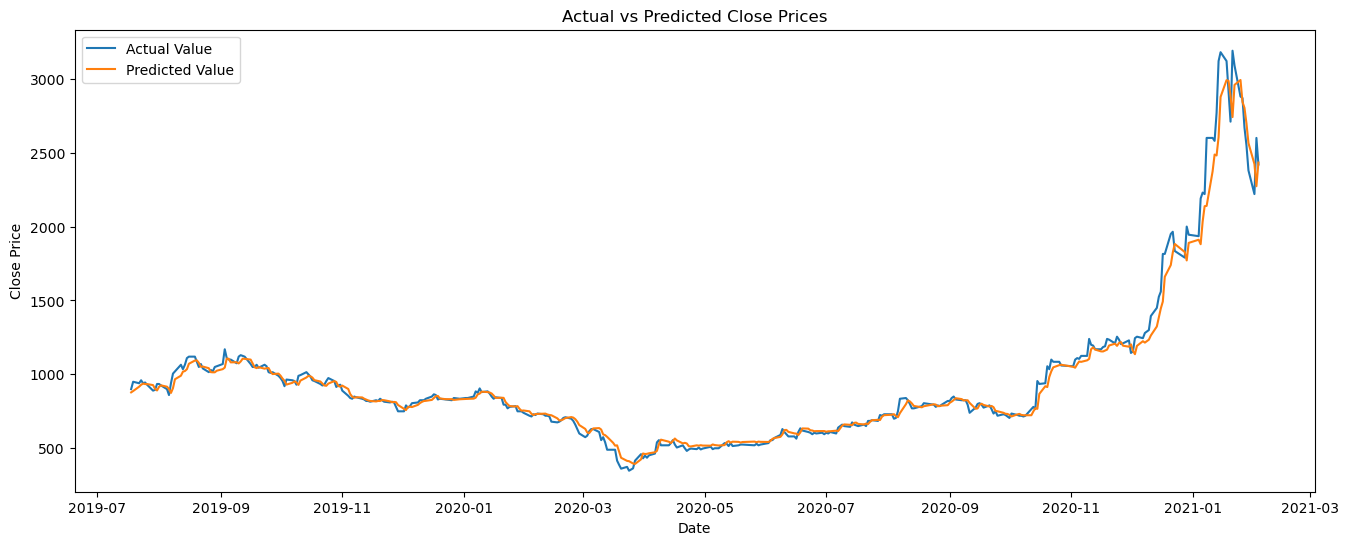

In [95]:
# Untuk membuat plot antara predicted dan actual values
LSTM_actual = pd.DataFrame(LSTM_original, index=stock["Date"].iloc[-len(y_test):], columns=["Actual_Close"])
LSTM_predicted = pd.DataFrame(LSTM_prediction, index=stock["Date"].iloc[-len(y_test):], columns=["Predicted_Close"])

plt.figure(figsize=(16, 6))
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(LSTM_actual["Actual_Close"], label="Actual Value")
plt.plot(LSTM_predicted["Predicted_Close"], label="Predicted Value")
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [96]:
# Untuk membuat dataframe yang terdiri dari waktu, predicted dan actual value
LSTM_data = pd.DataFrame(index=stock["Date"].iloc[-len(y_test):])
LSTM_data["Actual Value"] = LSTM_original.flatten()
LSTM_data["Predicted Value"] = LSTM_prediction.flatten()
LSTM_data

,Actual Value,Predicted Value
Date,,
2019-07-18,900.0,878.140137
2019-07-19,950.0,887.186340
2019-07-22,940.0,916.457764
2019-07-23,960.0,929.265747
2019-07-24,940.0,937.735657
...,...,...
2021-01-28,2550.0,2698.458496
2021-01-29,2380.0,2564.911377
2021-02-01,2220.0,2423.229492


### LSTM with Self-Attention

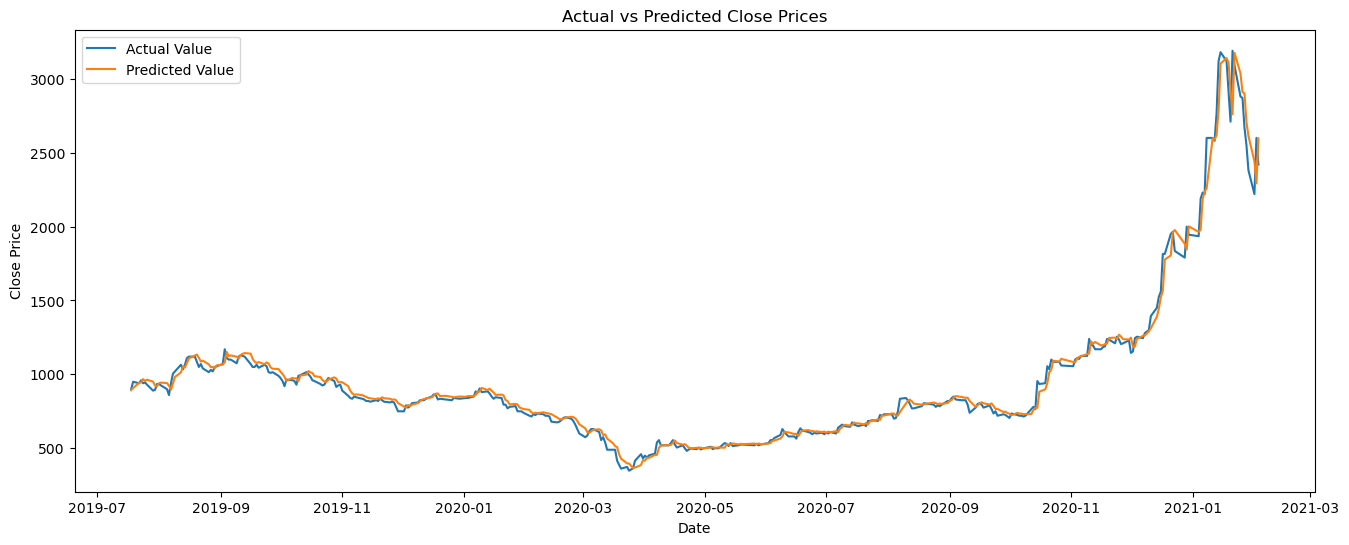

In [97]:
# Untuk membuat plot antara predicted dan actual values
self_LSTM_actual = pd.DataFrame(self_LSTM_original, index=stock["Date"].iloc[-len(y_test):], columns=["Actual_Close"])
self_LSTM_predicted = pd.DataFrame(self_LSTM_prediction, index=stock["Date"].iloc[-len(y_test):], columns=["Predicted_Close"])

plt.figure(figsize=(16, 6))
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(self_LSTM_actual["Actual_Close"], label="Actual Value")
plt.plot(self_LSTM_predicted["Predicted_Close"], label="Predicted Value")
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [98]:
# Untuk membuat dataframe yang terdiri dari waktu, predicted dan actual value
self_LSTM_data = pd.DataFrame(index=stock["Date"].iloc[-len(y_test):])
self_LSTM_data["Actual Value"] = self_LSTM_original.flatten()
self_LSTM_data["Predicted Value"] = self_LSTM_prediction.flatten()
self_LSTM_data

,Actual Value,Predicted Value
Date,,
2019-07-18,900.0,893.458374
2019-07-19,950.0,907.461426
2019-07-22,940.0,942.714722
2019-07-23,960.0,945.633972
2019-07-24,940.0,967.934204
...,...,...
2021-01-28,2550.0,2707.025635
2021-01-29,2380.0,2612.443359
2021-02-01,2220.0,2440.907715


## Kesimpulan

Setelah melakukan serangkaian tahap dari analisis time series pada harga saham, beberapa hal yang dapat disimpulkan diantaranya adalah sebagai berikut.
1. Datanya konsisten dengan interval waktu 1 hari dan 3 hari, dimana interval 3 hari ada karena tidak ada data yang bisa diambil pada hari Sabtu dan Minggu karena pasar saham tutup.
2. Self-Attention adalah suatu mekanisme yang memfokuskan model pada bagian yang dianggap penting atau relevan dari input ketika menghasilkan output berdasarkan bobot yang diperoleh.
3. Sequential Self-Attention berhasil membuat model menjadi lebih baik dalam melakukan prediksi.

## Reference

Bhandari, H. N., Rimal, B., Pokhrel, N. R., Rimal, R., Dahal, K. R., & Khatri, R. K. (2022). Predicting stock market index using LSTM. Machine Learning with Applications, 9, 100320. https://www.sciencedirect.com/science/article/pii/S2666827022000378/pdfft?md5=5badaa4047146fa6a9e0e7511e236ece&pid=1-s2.0-S2666827022000378-main.pdf

Gülmez, B. (2023). Stock price prediction with optimized deep LSTM network with artificial rabbits optimization algorithm. Expert Systems with Applications, 227, 120346. https://www.sciencedirect.com/science/article/pii/S0957417423008485/pdfft?md5=0d189bd07fdde9cd8f9640c65b881b1c&pid=1-s2.0-S0957417423008485-main.pdf

Kang, W. C., & McAuley, J. (2018, November). Self-attentive sequential recommendation. In 2018 IEEE international conference on data mining (ICDM) (pp. 197-206). IEEE. https://arxiv.org/pdf/1808.09781 

The Python Package Index (PyPI). (n.d.). Keras Self-Attention. https://pypi.org/project/keras-self-attention/